In [2]:
# Make a function for load the data set
def load_dataset(path):
    import pandas as pd
    df = pd.read_csv(path)
    return df

In [11]:
df = load_dataset("https://raw.githubusercontent.com/TripathiAshutosh/dataset/main/banking.csv")
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [13]:
# df.isnull().sum()

In [18]:
# Create an function for data cleaned
def cleaned_data(data):
    print(data.isnull().sum())
    print("After Cleaning \n")
    data = data.dropna()
    print(data.isnull().sum())
    return data

In [19]:
data = cleaned_data(df)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
After Cleaning 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [24]:
import pandas as pd

In [82]:
def preprocessing(data):
    import numpy as np
    data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
    data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
    
    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1

    cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    data_vars=data.columns.values.tolist()
    to_keep=[i for i in data_vars if i not in cat_vars]
    
    final_data=data[to_keep]
    
    
    final_data.columns = final_data.columns.str.replace('.','_')
    final_data.columns = final_data.columns.str.replace(' ','_')
    return final_data

In [26]:
preprocess_data = preprocessing()

In [27]:
preprocess_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin_,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_high_school,education_illiterate,education_professional_course,education_university_degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


In [28]:
# Make a function for train test split
def train_test_split(data):
    from sklearn.model_selection import train_test_split
    X = preprocess_data.drop(columns='y')
    y = preprocess_data['y']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=47,stratify=y)
    return X_train,X_test,y_train,y_test

In [29]:
X_train,X_test,y_train,y_test = train_test_split(preprocess_data)

In [34]:
X_train.shape,preprocess_data.shape,X_test.shape

((28831, 61), (41188, 62), (12357, 61))

In [35]:
def oversampling_target_class(X_train,y_train):
    from imblearn.over_sampling import SMOTE
    os = SMOTE(random_state=0)
    columns = X_train.columns
    os_data_X,os_data_y=os.fit_resample(X_train, y_train)

    os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
    os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
    # we can Check the numbers of our data
    print("length of oversampled data is ",len(os_data_X))
    print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
    print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
    print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
    print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
    
    X_train = os_data_X
    y_train = os_data_y['y']
 
    return X_train, y_train

In [36]:
X_train,y_train = oversampling_target_class(X_train,y_train)

length of oversampled data is  51166
Number of no subscription in oversampled data 25583
Number of subscription 25583
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [41]:
# basic classifier
def basic_classifier(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    global rfc
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    
    return rfc
    

In [42]:
model = basic_classifier(X_train,y_train)

In [43]:
def model_score(X_train,y_train):
    score = rfc.score(X_train,y_train)
    return score

In [44]:
model_score(X_train,y_train)

1.0

In [113]:
# Make function for prediction
def y_predict(model,X_test):
    y_pred = model.predict(X_test)
    return y_pred

In [53]:
# Get Metricscs
def metrics(y_test,y_pred):
    from sklearn.metrics import accuracy_score,recall_score,precision_score
    acc = print('Accuracy score: ',accuracy_score(y_pred,y_test))
    recall = print('Recal Score: ',recall_score(y_pred,y_test))
    preecision = print('precision score: ',precision_score(y_pred,y_test))
    return acc,recall,preecision

In [57]:
# y_pred_test = y_pred(rfc,X_test)

In [114]:
metrics(y_test,y_pred)

Accuracy score:  0.9101723719349356
Recal Score:  0.6184873949579832
precision score:  0.5287356321839081


(None, None, None)

In [67]:
# Create ROC AUC curve
def create_roc_auc_curve(model,X_train,y_train):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    metrics.RocCurveDisplay.from_estimator(model,X_train,y_train)
    plt.savefig('roc_auc_curve.png')

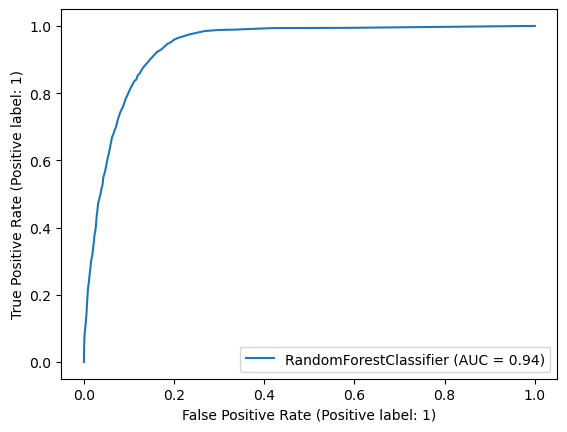

In [69]:
create_roc_auc_curve(model,X_test,y_test)

In [76]:
# Confusion Matrix
def create_confusion_matrix(model,X_train,y_train):
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics
    import matplotlib.pyplot as plt
    metrics.ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)
    plt.savefig('Confuision_Matrics.png')

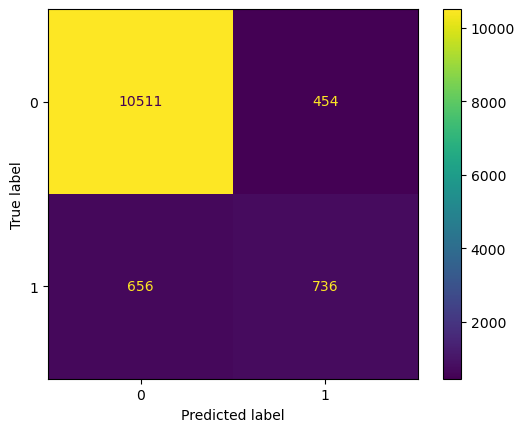

In [78]:
create_confusion_matrix(model,X_test,y_test)

In [109]:
def hyper_param_model(X_train,y_train):
    import numpy as np
    n_estimators = [5,21,51,101] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False]

    random_grid = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap': bootstrap
                  }
    
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier()
    model_tuning = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,
                   n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    model_tuning.fit(X_train, y_train)

    print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', model_tuning.best_params_, ' \n')

    best_params = model_tuning.best_params_
    
    n_estimators = best_params['n_estimators']
    min_samples_split = best_params['min_samples_split']
    min_samples_leaf = best_params['min_samples_leaf']
    max_features = best_params['max_features']
    max_depth = best_params['max_depth']
    bootstrap = best_params['bootstrap']
    
    model_tuned = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split,
                                         min_samples_leaf= min_samples_leaf, max_features = max_features,
                                         max_depth= max_depth, bootstrap=bootstrap) 
    model_tuned.fit( X_train, y_train)
    return model_tuned,best_params

In [111]:
tuned_mode = hyper_param_model(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Random grid:  {'n_estimators': [5, 21, 51, 101], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 51, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}  



# Starts mlflow from here

In [85]:
import mlflow

In [150]:
experiment_Name = "Basic_Experiment"
run_name = "term_deposite"
run_metrics = metrics(y_pred,y_test)
print(run_metrics)

Accuracy score:  0.9120336651290767
Recal Score:  0.5804597701149425
precision score:  0.6163234172387491
(None, None, None)


In [87]:
# Create function for Mlflow

In [188]:
def create_for_basic(experiment_name,run_name,run_metrics,model,confusion_matrix_path = None,roc_auc_plot_path = None, run_params = None):
    mlflow.set_experiment(experiment_name = experiment_Name)
    with mlflow.start_run():
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param,run_params[param])
                
        # for metrics in run_metrics:
        #     mlflow.log_metric(metrics,value=run_metrics[metrics[0]])

        mlflow.sklearn.log_model(model, "model")
    
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [96]:
create_for_basic(experiment_Name,run_name,run_metrics,rfc,'Confuision_Matrics.png','roc_auc_curve.png')

Run - term_deposite is logged to Experiment - Basic_Experiment


# For hyperparamter

In [159]:
import mlflow
experiment_name = "Tuned_model"
run_name = "random_search_CV_parameter"
model_tuned,best_params = hyper_param_model(X_train,y_train)
run_params = best_params

y_pred = y_predict(model_tuned,X_test) #will return the predicted class
run_metrics = metrics(y_test, y_pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Random grid:  {'n_estimators': [5, 21, 51, 101], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 51, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}  

Accuracy score:  0.9110625556364813
Recal Score:  0.6102332580887886
precision score:  0.5826149425287356


In [162]:
y_pred = y_predict(model_tuned,X_test)

In [124]:
run_params = best_params

In [163]:
run_metrics = metrics(y_test, y_pred)
run_metrics

Accuracy score:  0.9110625556364813
Recal Score:  0.6102332580887886
precision score:  0.5826149425287356


(None, None, None)

In [125]:
run_params

{'n_estimators': 101,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': True}

In [126]:
for param in run_params:
    print(param,run_param[param])

n_estimators 101
min_samples_split 10
min_samples_leaf 1
max_features sqrt
max_depth 70
bootstrap True


In [192]:
create_for_basic(experiment_name,run_name,run_metrics,model_tuned,'Confuision_Matrics.png','roc_auc_curve.png',run_params)

Run - random_search_CV_parameter is logged to Experiment - Tuned_model


In [177]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
        
    import mlflow
    #mlflow.set_tracking_uri("http://localhost:5000") #uncomment this line if you want to use any database like sqlite as backend storage for model
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run():
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        if not metric in run_metrics:
            # if value is not None:  # Ensure the value is not None before logging
                mlflow.log_metric(metric, value)
        mlflow.sklearn.log_model(model, "model")
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Random Forest")
        mlflow.set_tags({"tag2":"Randomized Search CV", "tag3":"Production"})
            
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))